🚀 ЗАПУСК Q-LEARNING В GRIDWORLD
🎯 Начало обучения...
Параметры: alpha=0.1, gamma=0.9, epsilon=0.3

Эпизод 100, Средняя награда: 8.47
Эпизод 200, Средняя награда: 9.01
Эпизод 300, Средняя награда: 9.02

✅ Обучение завершено!

📏 Оптимальный путь (9 шагов):
  Шаг 0: (0, 0)
  Шаг 1: (0, 1)
  Шаг 2: (1, 1)
  Шаг 3: (2, 1)
  Шаг 4: (2, 2)
  Шаг 5: (2, 3)
  Шаг 6: (3, 3)
  Шаг 7: (4, 3)
  Шаг 8: (4, 4)

📊 Визуализация результатов...


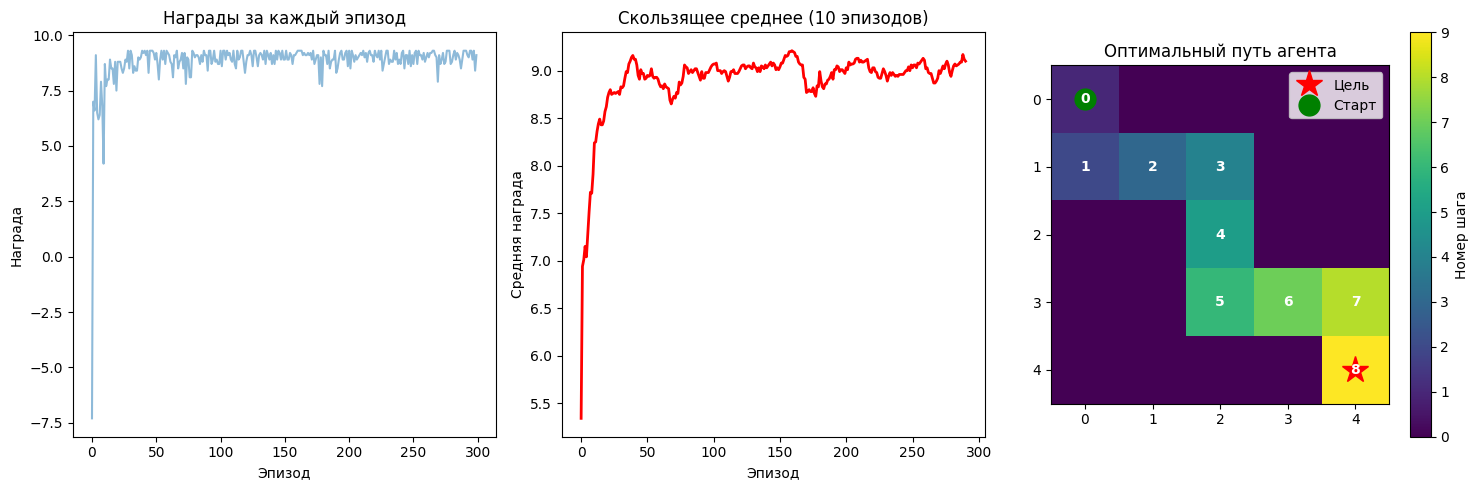

🎬 Запуск анимации...


/tmp/ipython-input-2063581013.py:185: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  ani = animation.FuncAnimation(fig, update, frames=len(path), interval=500, blit=True, repeat=True)
/tmp/ipython-input-2063581013.py:185: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  ani = animation.FuncAnimation(fig, update, frames=len(path), interval=500, blit=True, repeat=True)
/tmp/ipython-input-2063581013.py:188: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  return HTML(ani.to_jshtml())
/tmp/ipython-input-2063581013.py:188: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  return HTML(ani.to_jshtml())


In [1]:
# 🎯 Q-Learning в GridWorld - Полный проект в Colab
# Автор: [Ваше имя]
# Дата: [Дата]

# === 1. УСТАНОВКА ЗАВИСИМОСТЕЙ ===
!pip install matplotlib numpy -q

# === 2. ИМПОРТ БИБЛИОТЕК ===
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os

# === 3. КЛАСС СРЕДЫ GRIDWORLD ===
class GridWorld:
    def __init__(self, size=5, goal=(4, 4)):
        self.size = size
        self.goal = goal
        self.actions = ['up', 'down', 'left', 'right']
        self.reset()

    def reset(self):
        self.state = (0, 0)
        return self.state

    def state_to_index(self, state):
        return state[1] * self.size + state[0]

    def step(self, action):
        x, y = self.state

        # Движение агента
        if action == 0:   # up
            y = max(0, y - 1)
        elif action == 1: # down
            y = min(self.size - 1, y + 1)
        elif action == 2: # left
            x = max(0, x - 1)
        elif action == 3: # right
            x = min(self.size - 1, x + 1)

        self.state = (x, y)

        # Награды
        if self.state == self.goal:
            return self.state, 10, True   # награда за цель
        else:
            return self.state, -0.1, False  # штраф за шаг

# === 4. КЛАСС Q-LEARNING АГЕНТА ===
class QLearningAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.9, epsilon=0.3):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((n_states, n_actions))

    def choose_action(self, state_idx):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)
        else:
            return np.argmax(self.Q[state_idx])

    def update(self, state_idx, action, reward, next_state_idx, done):
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.Q[next_state_idx])

        self.Q[state_idx, action] += self.alpha * (target - self.Q[state_idx, action])

    def train(self, env, episodes=400):
        rewards_history = []

        for episode in range(episodes):
            state = env.reset()
            total_reward = 0
            done = False

            while not done:
                state_idx = env.state_to_index(state)
                action = self.choose_action(state_idx)
                next_state, reward, done = env.step(action)
                next_state_idx = env.state_to_index(next_state)

                self.update(state_idx, action, reward, next_state_idx, done)
                state = next_state
                total_reward += reward

            rewards_history.append(total_reward)

            if (episode + 1) % 100 == 0:
                avg_reward = np.mean(rewards_history[-100:])
                print(f"Эпизод {episode + 1}, Средняя награда: {avg_reward:.2f}")

        return rewards_history

    def get_path(self, env):
        state = env.reset()
        done = False
        path = [state]

        while not done:
            state_idx = env.state_to_index(state)
            action = np.argmax(self.Q[state_idx])
            next_state, reward, done = env.step(action)
            path.append(next_state)
            state = next_state

        return path

# === 5. ФУНКЦИЯ ВИЗУАЛИЗАЦИИ ===
def visualize_learning(rewards, path, env):
    """Визуализация результатов обучения"""

    # График обучения
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(rewards, alpha=0.5)
    plt.title('Награды за каждый эпизод')
    plt.xlabel('Эпизод')
    plt.ylabel('Награда')

    plt.subplot(1, 3, 2)
    window = 10
    moving_avg = [np.mean(rewards[i:i+window]) for i in range(len(rewards)-window+1)]
    plt.plot(moving_avg, color='red', linewidth=2)
    plt.title(f'Скользящее среднее ({window} эпизодов)')
    plt.xlabel('Эпизод')
    plt.ylabel('Средняя награда')

    # Визуализация пути
    plt.subplot(1, 3, 3)
    grid = np.zeros((env.size, env.size))

    # Отмечаем путь
    for i, (x, y) in enumerate(path):
        grid[y, x] = i + 1  # номер шага

    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Номер шага')
    plt.plot(env.goal[0], env.goal[1], 'r*', markersize=20, label='Цель')
    plt.plot(0, 0, 'go', markersize=15, label='Старт')

    # Добавляем номера шагов
    for i, (x, y) in enumerate(path):
        plt.text(x, y, str(i), ha='center', va='center', color='white', fontweight='bold')

    plt.title('Оптимальный путь агента')
    plt.legend()

    plt.tight_layout()
    plt.show()

def animate_path(env, path):
    """Анимация движения агента"""
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-0.5, env.size - 0.5)
    ax.set_ylim(-0.5, env.size - 0.5)
    ax.set_xticks(range(env.size))
    ax.set_yticks(range(env.size))
    ax.grid(True)
    ax.set_title("🎯 Q-learning агент в GridWorld")

    # Отрисовываем цель и старт
    goal_x, goal_y = env.goal
    ax.plot(goal_x, goal_y, 'g*', markersize=20, label="Цель 🎯")
    ax.plot(0, 0, 'bo', markersize=15, label="Старт 🚀")

    # Агент (красная точка)
    agent_marker, = ax.plot([], [], 'ro', markersize=15)

    ax.legend()

    def update(frame):
        if frame < len(path):
            x, y = path[frame]
            agent_marker.set_data([x], [y])
        return agent_marker,

    ani = animation.FuncAnimation(fig, update, frames=len(path), interval=500, blit=True, repeat=True)
    plt.close()  # Предотвращаем дублирование отображения

    return HTML(ani.to_jshtml())

# === 6. ЗАПУСК И ДЕМОНСТРАЦИЯ ===
print("🚀 ЗАПУСК Q-LEARNING В GRIDWORLD")
print("=" * 50)

# Создаем среду и агента
env = GridWorld(size=5, goal=(4,4))
agent = QLearningAgent(n_states=25, n_actions=4, epsilon=0.3)

print("🎯 Начало обучения...")
print(f"Параметры: alpha={agent.alpha}, gamma={agent.gamma}, epsilon={agent.epsilon}")
print()

# Обучаем агента
rewards = agent.train(env, episodes=300)

print()
print("✅ Обучение завершено!")
print()

# Получаем оптимальный путь
path = agent.get_path(env)
print(f"📏 Оптимальный путь ({len(path)} шагов):")
for i, pos in enumerate(path):
    print(f"  Шаг {i}: {pos}")

# Визуализация
print()
print("📊 Визуализация результатов...")
visualize_learning(rewards, path, env)

print("🎬 Запуск анимации...")
animate_path(env, path)